# Time-lagged covariance

Consider a trajectory $x(t)$, sampled at a time series $t_i$, $i=1,...,N$. The time series is taken at regular intervals $\Delta t = t_{i+1} - t_i$.

Let's first consider the **time-lagged covariance** in the trajectory samples taken at some time $t$, and those taken at some time in the future $t+\tau$,

$$ \text{Cov}(x(t), x(t+\tau))  = \langle (x(t) - \bar{x}) (x(t+\tau) - \bar{x}) \rangle_t .$$

We will call $\tau$ the **lag time**.  Here, the angle brackets $\langle \cdot \rangle_t$ represent an average over all time points $t$, and $\bar{x} = \langle x(t) \rangle_t$ represents the mean value of $x(t)$ over all samples.  Numerically, we compute these as

$$ \bar{x} = \frac{1}{N} \sum_{i=1}^{N} x(t_i), $$

$$ \text{Cov}(x(t), x(t+\tau)) = \frac{1}{N-T} \sum_{i=1}^{N-T} (x(t_i) - \bar{x}) (x(t_{i+T}) - \bar{x}) , $$
where $\tau$ is $T$ time steps in the future.  

Note that when $\tau = 0$ ($T=0$), the time-lagged covariance becomes simply the variance of $x(t)$:

$$ \text{Cov}(x(t), x(t)) = \text{Var}(x(t)) = \frac{1}{N} \sum_{i=1}^{N} (x(t_i) - \bar{x})^2  $$


What happens to the covariance $\text{Cov}(x(t), x(t+\tau))$ in limit of $\tau \rightarrow \infty$?   If the trajectory $x(t)$ corresponds to some kind of **stochastic dynamics**, then we assume that samples taken at time $t$ and some very distant time in the future are completely uncorrelated, such that

$$ \lim_{\tau \rightarrow \infty} \text{Cov}(x(t), x(t+\tau)) = 0 .$$

One way to think about this: for very time-distant pairs of samples, there is equal probabiliity for $x(t)$ and $x(t+\tau)$ to be above or below the mean, so that the average of $(x(t) - \bar{x}) (x(t+\tau) - \bar{x}) $ over all samples goes to zero.

# The autocorrelation function

Let's define the **autocorrelation function (ACF)** as

$$ g(\tau) = \frac{\text{Cov}(x(t), x(t+\tau))}{\text{Var}(x(t))} = \frac{\langle (x(t) - \bar{x}) (x(t+\tau) - \bar{x}) \rangle_t}{\langle (x(t) - \bar{x})^2 \rangle_t} .$$

This is basically a *normalized* version of the time-lagged correlation.  From above, we know that $g(\tau) = 1$ when $\tau = 0$, and decays to to $g(\tau) = 0$ when $\tau \rightarrow \infty$.  What kind of function is $g(\tau)$? 

For a Langevin stochastic process (in which dynamics is subject to a random, fluctuating *forces* $f(t)$ with $\langle f(t) \rangle = 0 $), it can be shown that the the velocity autocorrelation function is an exponential decay, with a time constant that depends on the friction coeffient and the mass.  In sufficiently complicated stochastic dynamical systems (i.e. coupling to a thermal bath through many intermolecular collisions), we also expect to $g(\tau)$ to exponentially decay with some time constant $\tau_c$,

$$ g(\tau) \sim e^{-\tau/\tau_c} .$$

The value $\tau_c$ is called the **correlation time**.

## The meaning of the correlation time, $\tau_c$

What physical meaning does $\tau_c$ have?  It represents the time scale at which the samples become decorrelated.  Time-lagged samples $x(t+\tau_c)$ are correlated to samples $x(t)$ by a factor of $1/e \approx 0.367$, while samples $x(t+2\tau_c)$ are correlated by a factor of $1/e^2 \approx 0.135$.  As the time lag $\tau$ gets larger, the correlation never fully goes away, but decays exponentially.

## Computing the correlation time from data

As we will see below, the autocorrelation function for any given time trace $x(t)$ can be very noisy, and may not look much like an exponential.  Only in the limit of long trajectories (or many short ones) will $g(\tau)$ start looking like an exponential.

How do we compute $\tau_c$ from data?  One (not recommended) way is to fit an exponential curve to the computed estimate of $g(\tau)$, where $\tau_c$ is the fit parameter.  A better way is numerically integration.  Provide that the computed autocorrelation functon has the functional form $g(\tau) = e^{-t/\tau_c}$, then integration should yield an estimate of $\tau_c$:

$$ \int_0^{\infty} g(\tau) d\tau = \int_0^{\infty} e^{-t/\tau_c} d\tau = \Big[ -\tau_c e^{-t/\tau_c} \Big]_0^{\infty} = \tau_c $$

In practice, the numerical intergration is performed up to some limit $\tau_{\text{max}}$ to reduce noise:

$$ \tau_c \approx \int_0^{\tau_{\text{max}}} g(\tau) d\tau $$




### Statistical inefficiency and subsampling trajectory data

In molecular simulations, we are often trying to estimate some equilibrium quantity, but instead of being able to obtain independent samples from an equilibrium distribution, we are stuck with sampling dynamical trajectories where the data is highly time-correlated.  The **statistical inefficiency** is the effective number of samples to stride a trajectory to remove time correlation:

$$ 2 \tau_c  + 1 $$

where $\tau_c$ is measured in number of time steps.   There is a good derivation of this expression in Chodera 2016 (1).

### Relation between $\tau_c$ and Markov process relaxation timescales

For trajectory traces $x(t)$ of more complicated stochastic dynamics, there is a connection between relaxations observed in an autocorrelation function, and the relaxation timescales of the stochastic dynamical operator that defines the evolution of a probability density $P(x,t)$ over time.

I don't have the time to provide a derivation right now (VAV: TO DO!), but the basic idea is that the eigenvalues $\lambda_n = -1/\tau_n$ and corresponding eignvalues $\psi_n$ of the dynamical operator provide a spectral decomposition description of the dynamics, through 

$$ P(x, t) = \sum_n c_n \psi_n(x) e^{-t/\tau_n} .$$

Here, the constants $c_n$ depend on the initial distribution at time $t=0$.  Computing the autocorrelation function for a infinitely long time trace $x(t)$ will contain exponential decays with these same time constants,  

$$ g(\tau) = \sum_n A_n e^{-\tau/\tau_n} . $$




### References

1. Chodera, John D. “A Simple Method for Automated Equilibration Detection in Molecular Simulations.” Journal of Chemical Theory and Computation 12, no. 4 (April 12, 2016): 1799–1805. https://doi.org/10.1021/acs.jctc.5b00784.





# Example

Okay, here's a very simple function to calculate an autocorrelation function given a time series stores as a `numpy` array:

In [20]:
import numpy as np

def autocorr(x):
    tau = x.size
    mu = x.mean()
    var = x.var()  # Variance for normalization
    g = np.correlate((x-mu), (x-mu), mode='full')[tau-1:]
    g = g / var
    n = np.arange(tau,0,-1)
    return g/n


Let's make up some fake time traces to give this function, using a really simple Markov process:

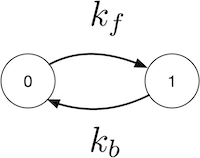

Let's set $k_f = 0.008$ and $k_b = 0.002$ (rates are in units of per time step), and generate a trajectory of 0's and 1's.  With these parameters, we know the following:
* The relaxation time for this Markov process is $\tau = 1/k_{\text{obs}} = 1/(k_f + k_b) = 1/(0.01) = 100$ time steps.
* The equilibrium constant $K = k_f/k_b = 4.0$.  This means that the stationary populations for states 0 and 1 are $(p_0, p_1) = (0.2, 0.8)$.
  
NOTE: We could pretend this might correspond to some physical process, say, isomerization of a peptide bond from a *cis* amide (0) to a *trans* amine (1). 

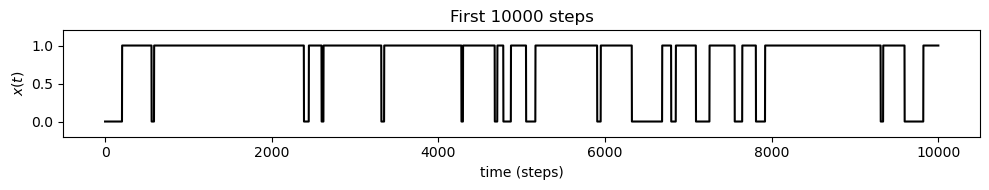

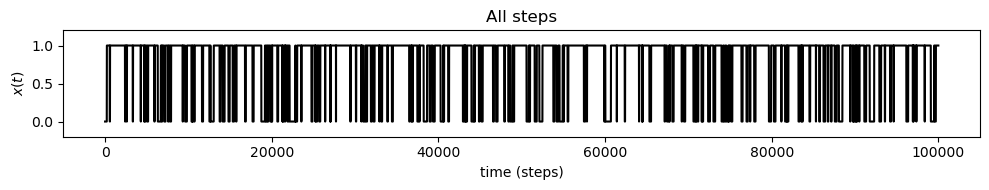

In [31]:
from matplotlib import pyplot as plt

def generate_traj(N, kf = 0.008, kb = 0.002):
    """Generate a trajectory for a two-state Markov system with forward and backward rates kf and kb.
    
    INPUT
    N - number of time steps in the trajectory
    
    PARAMETERS
    kf - forward rate, in units of per time step
    kb - backward rate, in units of per time step
    """

    x = np.zeros(N)   
    
    t = 0
    
    x[t] = 0  # starting state
    while t < N-1:
        if x[t] == 0:
            if np.random.rand() < kf:
                x[t+1] = 1
            else:
                x[t+1] = 0
        if x[t] == 1:
            if np.random.rand() < kb:
                x[t+1] = 0
            else:
                x[t+1] = 1
        t += 1
    return x


N = 100000 # number of samples
x = generate_traj(N)

# Plot the first 10000 steps of the time trace:
N_max = 10000
plt.figure(figsize=(10,2))
plt.plot(np.arange(N_max), x[0:N_max], 'k-')
plt.ylim(-0.2, 1.2)
plt.xlabel('time (steps)')
plt.ylabel('$x(t)$')
plt.title('First 10000 steps')
plt.tight_layout()

# Plot all steps of the time trace:
plt.figure(figsize=(10,2))
plt.plot(np.arange(N), x[0:N], 'k-')
plt.ylim(-0.2, 1.2)
plt.xlabel('time (steps)')
plt.ylabel('$x(t)$')
plt.title('All steps')
plt.tight_layout()



And here's what the autocorrelation function looks like for this data:

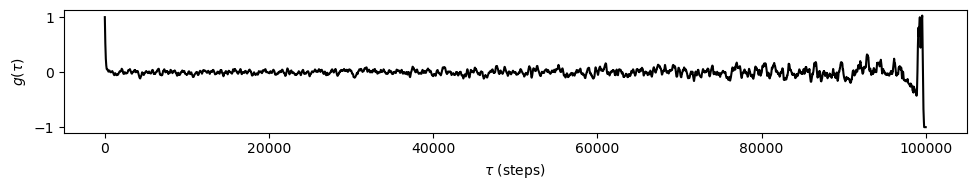

In [37]:
g = autocorr(x)

plt.figure(figsize=(10,2))
plt.plot(np.arange(N), g, 'k-')
plt.xlabel('$\\tau$ (steps)')
plt.ylabel('$g(\\tau)$')
plt.tight_layout()

There are some things to note here about the results:
1. First, all the exciting exponential decay is happening at small values of $\tau$, less than 10000 steps.  We only need to examine the early values of $\tau$ to estimate the correlation time.
2. The $g(\tau)$ function gets very noisy at large values of $\tau$.  This is because there is less data being averaged.

Let's zoom in on just the $\tau$ < 10000 region:


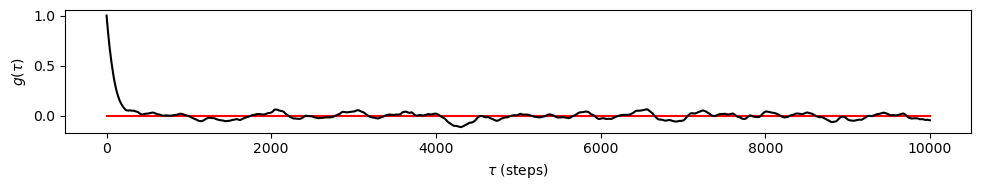

In [38]:
Nmax = 10000
plt.figure(figsize=(10,2))
plt.plot([0,Nmax],[0,0],'r-')    # show tau-axis
plt.plot(np.arange(Nmax), g[0:Nmax], 'k-')
plt.xlabel('$\\tau$ (steps)')
plt.ylabel('$g(\\tau)$')
plt.tight_layout()

I've drawn the $x$-axis to see the asymptote. It *looks* exponential ... but still a bit noisy.  

Let's compute an estimate of the correlation time $\tau_c$, by numerically integrating $g(\tau)$ from $\tau$ = 0 to 10000.  This means we just add up the first 10000 values in the $g(\tau)$ array.  The value should be close to our predicted relaxation time of 100 steps.

In [42]:
Nmax = 10000
tau_c = np.sum(g[0:Nmax])
print('Estimated tau_c =', tau_c)

Estimated tau_c = 30.122473800584167


Hmmm, doesn't seem to match well.  Let's try generating a series trajectories and seeing what kind of results we get...

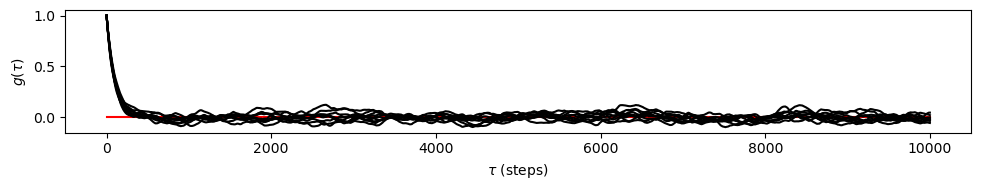

In [44]:
ntrajs = 10
N = 100000 # number of samples

# generate several trajectories and store them in a list
trajs = [generate_traj(N) for i in range(ntrajs)]
autocorrs = [ autocorr(x) for x in trajs ]


Estimated tau_c = 106.8947126701209
Estimated tau_c = 66.98491185252571
Estimated tau_c = 25.008216141734657
Estimated tau_c = 37.85266893907013
Estimated tau_c = 101.49654106524576
Estimated tau_c = -19.30547468301799
Estimated tau_c = 143.109134545939
Estimated tau_c = 114.63002748976815
Estimated tau_c = 67.72245743285373
Estimated tau_c = 167.42729661457747
Mean tau_c: 81.18204920688176 +/- 53.83232298998813


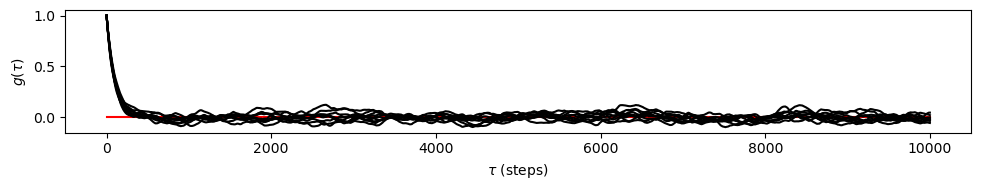

In [47]:

# plot them all and compute all the estimated correlation times and the average
tau_c_values = []
Nmax = 10000
plt.figure(figsize=(10,2))
plt.plot([0,Nmax],[0,0],'r-')    # show tau-axis
for g in autocorrs:
    plt.plot(np.arange(Nmax), g[0:Nmax], 'k-')
    tau_c = np.sum(g[0:Nmax])
    tau_c_values.append(tau_c)
    print('Estimated tau_c =', tau_c)
plt.xlabel('$\\tau$ (steps)')
plt.ylabel('$g(\\tau)$')
plt.tight_layout()

print('Mean tau_c:', np.mean(tau_c_values), '+/-', np.std(tau_c_values))

Wow, these estimates are still really noisy... let's focus on just $\tau$ < 500.

Estimated tau_c = 90.82346800922545
Estimated tau_c = 88.24454671083221
Estimated tau_c = 95.04956863512811
Estimated tau_c = 104.74481136228593
Estimated tau_c = 93.98496960004051
Estimated tau_c = 115.79224367164628
Estimated tau_c = 108.46796212874916
Estimated tau_c = 93.5943226669589
Estimated tau_c = 109.97889297928427
Estimated tau_c = 98.88110535772898
Mean tau_c: 99.95618911218799 +/- 8.766670399605301


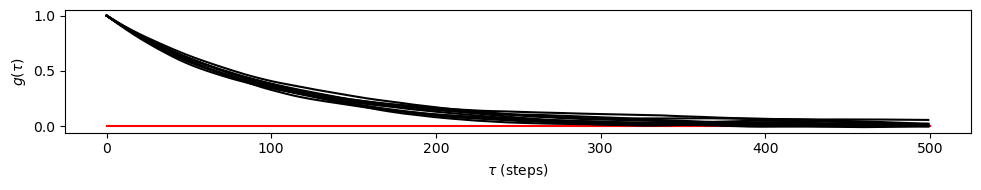

In [50]:
# plot them all and compute all the estimated correlation times and the average
tau_c_values = []
Nmax = 500
plt.figure(figsize=(10,2))
plt.plot([0,Nmax],[0,0],'r-')    # show tau-axis
for g in autocorrs:
    plt.plot(np.arange(Nmax), g[0:Nmax], 'k-')
    tau_c = np.sum(g[0:Nmax])
    tau_c_values.append(tau_c)
    print('Estimated tau_c =', tau_c)
plt.xlabel('$\\tau$ (steps)')
plt.ylabel('$g(\\tau)$')
plt.tight_layout()

print('Mean tau_c:', np.mean(tau_c_values), '+/-', np.std(tau_c_values))

These estimates are much better!  Very close to the actual value of 100 steps, with standard error less than 10 steps.

To see how this estimate improves with more trajectories, let's try creating 100 trajectories! (<font color='red'>WARNING: This may take a few minutes</font>)

In [51]:
ntrajs = 100
N = 100000 # number of samples

# generate several trajectories and store them in a list
trajs, autocorrs = [], []
print(f'Generating {ntrajs} trajectories... ', end='')
for i in range(ntrajs):
    print(f'{i} ', end='')
    x = generate_traj(N)
    g = autocorr(x)
    trajs.append(x)
    autocorrs.append(g)

Generating trajectory 0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899

Estimated tau_c = 98.51670251990367
Estimated tau_c = 111.16385433564757
Estimated tau_c = 101.45748878862503
Estimated tau_c = 97.7333371341322
Estimated tau_c = 86.00762180105576
Estimated tau_c = 86.63268425627014
Estimated tau_c = 110.66237245595033
Estimated tau_c = 98.45533848045625
Estimated tau_c = 76.69137893744147
Estimated tau_c = 88.1085415994005
Estimated tau_c = 102.3114947777535
Estimated tau_c = 116.04197515945181
Estimated tau_c = 98.49177123727989
Estimated tau_c = 99.28278316370948
Estimated tau_c = 89.11459730453787
Estimated tau_c = 109.28155056489669
Estimated tau_c = 113.58053170259109
Estimated tau_c = 95.5831705282349
Estimated tau_c = 91.95086328166046
Estimated tau_c = 117.73753626005518
Estimated tau_c = 100.04335418439081
Estimated tau_c = 96.84663186608655
Estimated tau_c = 109.10008751764937
Estimated tau_c = 113.8705581949408
Estimated tau_c = 125.20322076091136
Estimated tau_c = 87.86784221354695
Estimated tau_c = 83.34956712587768
Estimated tau_c = 111

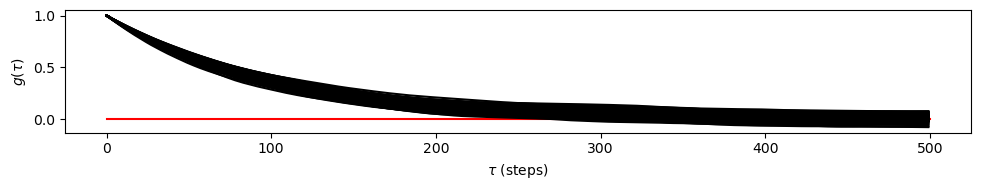

In [55]:
# plot them all and compute all the estimated correlation times and the average
tau_c_values = []
Nmax = 500
plt.figure(figsize=(10,2))
plt.plot([0,Nmax],[0,0],'r-')    # show tau-axis
for g in autocorrs:
    plt.plot(np.arange(Nmax), g[0:Nmax], 'k-')
    tau_c = np.sum(g[0:Nmax])
    tau_c_values.append(tau_c)
    print('Estimated tau_c =', tau_c)
plt.xlabel('$\\tau$ (steps)')
plt.ylabel('$g(\\tau)$')
plt.tight_layout()

print('Mean tau_c:', np.mean(tau_c_values), '+/-', np.std(tau_c_values))